In [25]:
import csv
import pandas as pd
import numpy as np
import plotnine
from plotnine import *
from plotnine.data import *
import matplotlib.style as style
import seaborn as sns
style.use('seaborn-poster')
import warnings
warnings.filterwarnings("ignore")
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

# Full information transparency

FIT = Full Information Transparency model 

ToM = Theory of Mind model

ST = experiments on varying similarity thresholds

NS = experiments on number of students (group size)

In [26]:
# Loading data for the similarity threshold experiments
FullInfSimThreshold =  pd.read_csv('SimThresFullInfo.csv',sep=',', skiprows=6, error_bad_lines=False)

In [27]:
# Loading data for the group size experiments
FullInfGroup =  pd.read_csv('GroupSizeFullInfo.csv',sep=',', skiprows=6, error_bad_lines=False)

In [28]:
#Renaming variables
FullInfSimThreshold.rename(columns={'[run number]':'run', '[step]' : 'tick', '[name] of student 7' : 'name' ,
                     '[plot_belief] of student 7' : 'belief' , 'mean_TotalTickChangeBel' : 'MeanBeliefChange',
                    'PercInfluenced': 'ShareInfluenced', 'SocialGroupSA' : 'SizeRefGroup', 'carshare': 'Share of car users',
                    'bikeshare': 'Share of bike users', 'busshare' : 'Share of bus users'},inplace=True)
FullInfGroup.rename(columns={'[run number]':'run', '[step]' : 'tick', '[name] of student 7' : 'name' ,
                     '[plot_belief] of student 7' : 'belief' , 'mean_TotalTickChangeBel' : 'MeanBeliefChange',
                    'PercInfluenced': 'ShareInfluenced', 'SocialGroupSA' : 'SizeRefGroup', 'carshare': 'Share of car users',
                    'bikeshare': 'Share of bike users', 'busshare' : 'Share of bus users'},inplace=True)

In [29]:
#Input for the values of similarity threshold (ST) and number of students (NS) which is varied with
lstST = [5, 9, 11, 13, 15, 17, 19, 21]
lstNS = [10,  5, 15, 20, 30, 25, 35, 40]

In [31]:
##Functions for determining labels and breaks
def labels(from_, to_, step_):
    return pd.Series(np.arange(from_, to_ + step_, step_)).apply(lambda x: '{:,}'.format(x)).tolist()
def breaks(from_, to_, step_):
    return pd.Series(np.arange(from_, to_ + step_, step_)).tolist()

#Setting plot themes
theme_set(
    theme_minimal() +
    theme(axis_text_x=element_text(angle=45))
    )
plotnine.themes.element_line (size = 0.001)
plotnine.themes.themeable.panel_spacing_x(5)

## Number of students - FIT

In [18]:
BoxplotNSFIT = (
    ggplot(FullInfGroup, aes(group = 'NumStudents') ) 
       + plotnine.geoms.geom_boxplot(
           aes(x='NumStudents', y='SizeRefGroup'),
                       size=0.2, alpha = 0.2
                       
           ) +
    labs(
        x = 'Number of students ',
         y = 'Average size of reference group',
    ) )

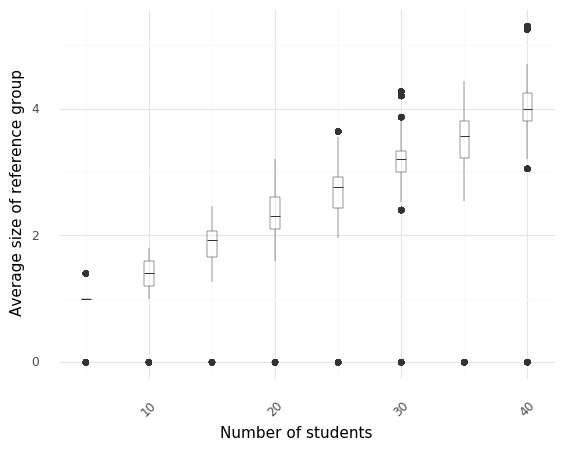

<ggplot: (-9223372036566624964)>

In [19]:
BoxplotNSFIT 

In [20]:
BoxplotNSFIT.save(filename = 'SizeRefGroupFIT.png', height=7, width=10, units = 'in', dpi=1000)

### Opinion Dynamics FIT , #Students

In [8]:
#Opinion dynamics for all mode-value combinations

OpinionSpaceFITNS =(ggplot(aes(x = 'tick', y='belief', group='run', colour = 'name')) 
         +
  geom_line(data=FullInfGroup, size=0.5, alpha = 0.2) 
         +
    labs(
        title ='Opinion space',
        x = 'ticks',
         y = 'Degree of belief',
    ) +
    scale_x_continuous(
        limits = (0, 1500),
        labels = labels(0, 1500, 500),
        breaks = breaks(0, 1500, 500)
    ) +
    scale_y_continuous(
        limits = (0, 12),
        labels = labels(0, 10, 5),
        breaks = breaks(0, 10, 5)
   ) + 
    facet_wrap(['NumStudents'])+
         theme(figure_size=(11, 8) ))

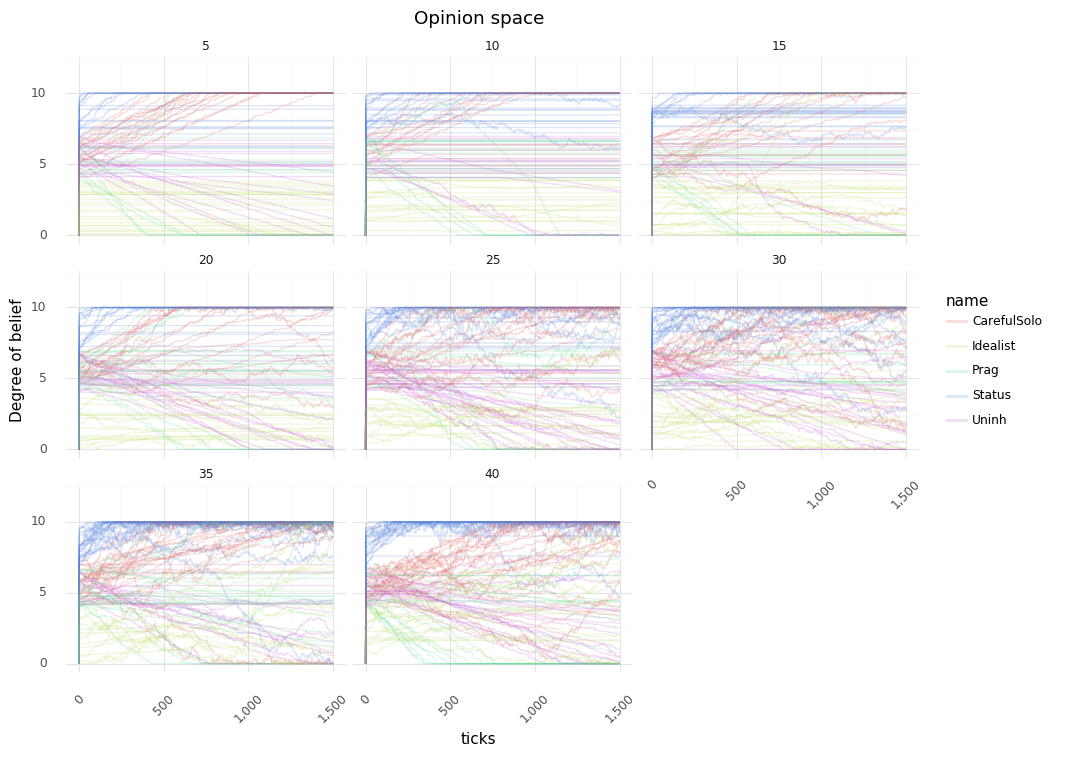

<ggplot: (-9223372036567815287)>

In [9]:
OpinionSpaceFITNS

In [23]:
OpinionSpaceFITNS.save(filename = 'OpinionSpaceFITNS.png', height=7, width=10, units = 'in', dpi=1000)

### Heat Map - FIT, #Students

In [8]:
for a in lstNS:
    Data2 = FullInfGroup[FullInfGroup['NumStudents'] == a]
    Sorted = Data2.sort_values('tick')
    NumTicks = np.arange(0, 1502)
    Average = pd.DataFrame(columns= ['Tick', 'Belief', 'Students'])

    
    Tick = []
    Belief = []
    NumStuds = []  
    Mode = []
    Value = []


    for i in NumTicks:
        low = (i-1)*100
        high = i *100
        Now = Sorted[low:high]
        zero = Now['zero'].mean(axis=0)
        one = Now['one'].mean(axis=0)
        two = Now['two'].mean(axis=0)
        three = Now['three'].mean(axis=0)
        four = Now['four'].mean(axis=0)
        five = Now['five'].mean(axis=0)
        six = Now['six'].mean(axis=0)
        seven = Now['seven'].mean(axis=0)
        eight = Now['eight'].mean(axis=0)
        nine = Now['nine'].mean(axis=0)

    
        Tick.append(i)
        Belief.append(0)
        NumStuds.append(zero)    

        Tick.append(i)
        Belief.append(1)
        NumStuds.append(one)
    
        Tick.append(i)
        Belief.append(2)
        NumStuds.append(two)
    
        Tick.append(i)
        Belief.append(3)
        NumStuds.append(three)   
   
        Tick.append(i)
        Belief.append(4)
        NumStuds.append(four)
    
        Tick.append(i)
        Belief.append(5)
        NumStuds.append(five)
    
        Tick.append(i)
        Belief.append(6)
        NumStuds.append(six)
    
        Tick.append(i)
        Belief.append(7)
        NumStuds.append(seven)
       
        Tick.append(i)
        Belief.append(8)
        NumStuds.append(eight)
   
        Tick.append(i)
        Belief.append(9)
        NumStuds.append(nine)
    
                
    Average.Tick = Tick
    Average.Belief = Belief
    Average.Students = NumStuds
    Average = Average.query('Tick == 0| Tick == 100 |Tick == 200 | Tick == 300 |Tick == 400| Tick == 500 | Tick == 600| Tick == 700 | Tick == 800| Tick == 900| Tick == 1000| Tick == 1100| Tick == 1200| Tick == 1300| Tick == 1400| Tick == 1500')       
    if a == 5:
        Average['Students'] = Average['Students'].apply(lambda x: (x / 5) * 100 )
        Average5 = Average
    if a == 10:
        Average['Students'] = Average['Students'].apply(lambda x: (x / 10) * 100)
        Average10 = Average
    if a == 15:
        Average['Students'] = Average['Students'].apply(lambda x: (x / 15) * 100)
        Average15 = Average
    if a == 20:
        Average['Students'] = Average['Students'].apply(lambda x: (x / 20) * 100)
        Average20 = Average
    if a == 25:
        Average['Students'] = Average['Students'].apply(lambda x: (x / 25) * 100)
        Average25 = Average
    if a == 30:    
        Average['Students'] = Average['Students'].apply(lambda x: (x / 30) * 100)
        Average30 = Average
    if a == 35:
        Average['Students'] = Average['Students'].apply(lambda x: ( x / 35) * 100)
        Average35 = Average
    if a == 40:
        Average['Students'] = Average['Students'].apply(lambda x: (x / 40) * 100)
        Average40 = Average
        
        
            

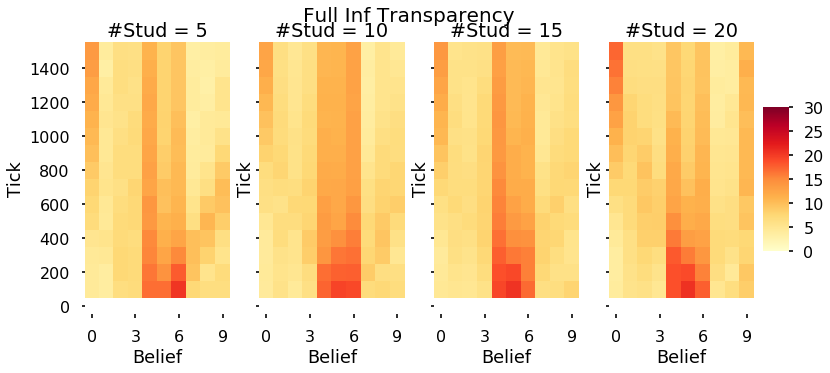

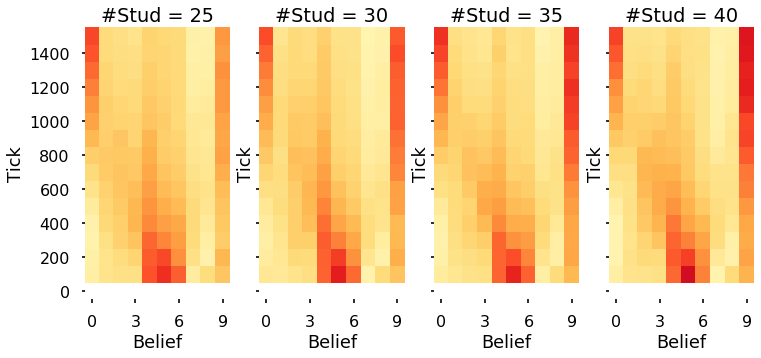

In [9]:
plt.cla()
plt.close()
fig1, (ax0,ax1,ax2,ax3) = plt.subplots(1,4, sharex=True, sharey=True)
fig2, (ax4,ax5,ax6,ax7) = plt.subplots(1,4, sharex=True, sharey=True)
cbar_ax = fig1.add_axes([.91,.3,.03,.4])
Data2 = Average5.pivot("Tick", "Belief", "Students")
Data3 = Average10.pivot("Tick", "Belief", "Students")
Data4 = Average15.pivot("Tick", "Belief", "Students")
Data5 = Average20.pivot("Tick", "Belief", "Students")
Data6 = Average25.pivot("Tick", "Belief", "Students")
Data7 = Average30.pivot("Tick", "Belief", "Students")
Data8 = Average35.pivot("Tick", "Belief", "Students")
Data9 = Average40.pivot("Tick", "Belief", "Students")

sns.heatmap(Data2,cmap="YlOrRd",ax=ax0,cbar=True,vmin=0,vmax=30,cbar_ax = cbar_ax)
sns.heatmap(Data3,cmap="YlOrRd",ax=ax1,cbar=True,vmin=0,vmax=30,cbar_ax = cbar_ax)
sns.heatmap(Data4,cmap="YlOrRd",ax=ax2,cbar=True,vmin=0,vmax=30,cbar_ax = cbar_ax)
sns.heatmap(Data5,cmap="YlOrRd",ax=ax3,cbar=True,vmin=0,vmax=30,cbar_ax = cbar_ax)
sns.heatmap(Data6,cmap="YlOrRd",ax=ax4,cbar=True,vmin=0,vmax=30,cbar_ax = cbar_ax)
sns.heatmap(Data7,cmap="YlOrRd",ax=ax5,cbar=True,vmin=0,vmax=30,cbar_ax = cbar_ax)
sns.heatmap(Data8,cmap="YlOrRd",ax=ax6,cbar=True,vmin=0,vmax=30,cbar_ax = cbar_ax)
sns.heatmap(Data9,cmap="YlOrRd",ax=ax7,cbar=True,vmin=0,vmax=30,cbar_ax = cbar_ax)

ax3.invert_yaxis()
ax7.invert_yaxis()

ax0.set_title('#Stud = 5')
ax1.set_title('#Stud = 10')
ax2.set_title('#Stud = 15')
ax3.set_title('#Stud = 20')
ax4.set_title('#Stud = 25')
ax5.set_title('#Stud = 30')
ax6.set_title('#Stud = 35')
ax7.set_title('#Stud = 40')

fig1.suptitle('Full Inf Transparency',fontsize=20)

fig1.set_size_inches(12,5,forward=True)
fig2.set_size_inches(12,5,forward=True)

plt.savefig('HeatMapFITNS.jpg')
plt.show()

## Similarity threshold - FIT

In [8]:
MeanBeliefChange = (
    ggplot(FullInfSimThreshold, aes(group = 'MeanBeliefChange') ) 
       + plotnine.geoms.geom_boxplot(
           aes(x='NumStudents', y='MeanBeliefChange'),
                       size=0.2, alpha = 0.2
                       
           ) +
    labs(
        x = 'Number of students ',
         y = 'MeanBeliefChange',
    ) )

In [ ]:
MeanBeliefChange

In [11]:
SizeRefGroupTOM = (
    ggplot(FullInfSimThreshold, aes(group = 'Similarity_Threshold') ) 
       + plotnine.geoms.geom_boxplot(
           aes(x='NumStudents', y='SizeRefGroup'),
                       size=0.2, alpha = 0.2
                       
           ) +
    labs(
        x = 'Number of students ',
         y = 'Size of reference group',
    ) )

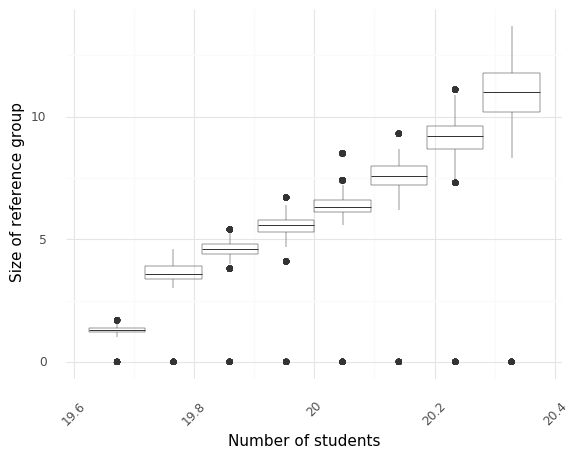

<ggplot: (-9223372036535160695)>

In [12]:
SizeRefGroupTOM

In [ ]:
SizeRefGroupTOM.save(filename = 'SizeRefGroupTOM.png', height=7, width=10, units = 'in', dpi=1000)

## Opinion Dyanmics ST - FIT

In [10]:
#Opinion dynamics for all mode-value combinations

OpinionSpaceFITST =(ggplot(aes(x = 'tick', y='belief', group='run', colour = 'name')) 
         +
  geom_line(data=FullInfSimThreshold, size=0.5, alpha = 0.2) 
         +
    labs(
        title ='Opinion space',
        x = 'ticks',
         y = 'Degree of belief',
    ) +
    scale_x_continuous(
        limits = (0, 1500),
        labels = labels(0, 1500, 500),
        breaks = breaks(0, 1500, 500)
    ) +
    scale_y_continuous(
        limits = (0, 12),
        labels = labels(0, 10, 5),
        breaks = breaks(0, 10, 5)
   ) + 
    facet_wrap(['Similarity_Threshold'])+
    #    theme(strip_text_y = element_text(angle =-45))+
         theme(figure_size=(11, 8) ))

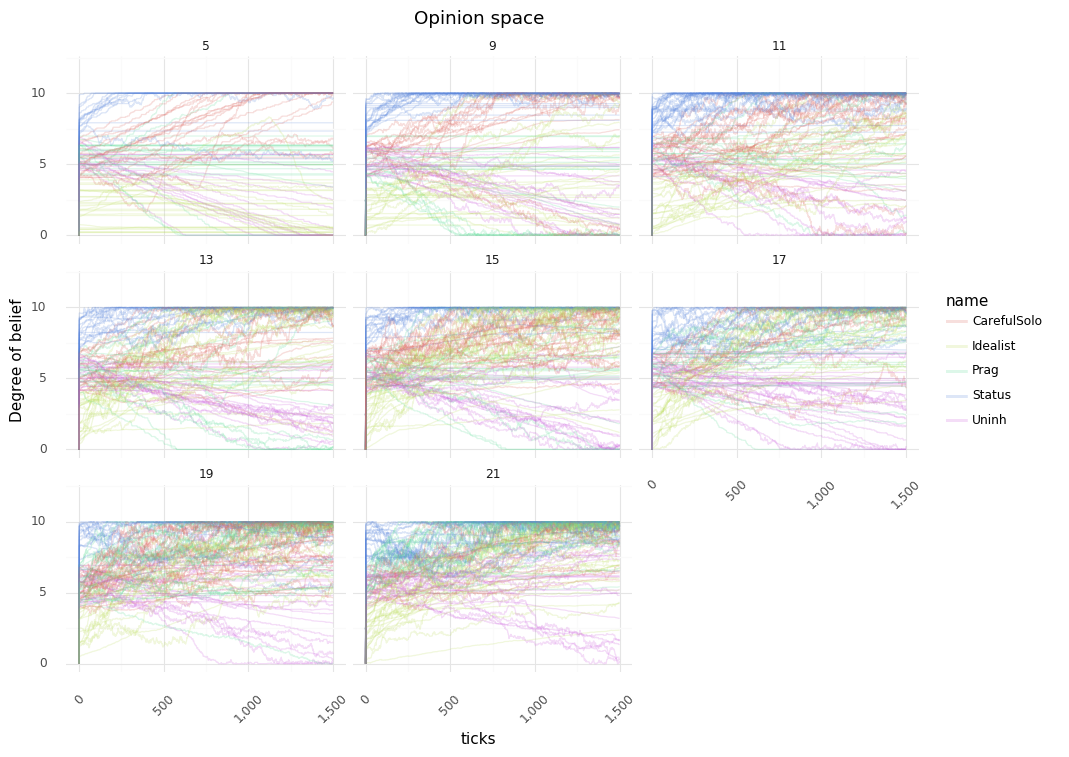

<ggplot: (295240189)>

In [11]:
OpinionSpaceFITST

In [ ]:
OpinionSpaceFITST.save(filename = 'OpinionSpaceFITST.png', height=7, width=10, units = 'in', dpi=1000)

### Heat Map, FIT, Sim Thres

In [ ]:
for a in lstST:
    Data2 = FullInfSimThreshold[FullInfSimThreshold['Similarity_Threshold'] == a]
    Sorted = Data2.sort_values('tick')
    NumTicks = np.arange(0, 1502)
    Average = pd.DataFrame(columns= ['Tick', 'Belief', 'Students'])

    
    Tick = []
    Belief = []
    NumStuds = []  
    Mode = []
    Value = []


    for i in NumTicks:
        low = (i-1)*100
        high = i *100
        Now = Sorted[low:high]
        zero = Now['zero'].mean(axis=0)
        one = Now['one'].mean(axis=0)
        two = Now['two'].mean(axis=0)
        three = Now['three'].mean(axis=0)
        four = Now['four'].mean(axis=0)
        five = Now['five'].mean(axis=0)
        six = Now['six'].mean(axis=0)
        seven = Now['seven'].mean(axis=0)
        eight = Now['eight'].mean(axis=0)
        nine = Now['nine'].mean(axis=0)

    
        Tick.append(i)
        Belief.append(0)
        NumStuds.append(zero)    

        Tick.append(i)
        Belief.append(1)
        NumStuds.append(one)
    
        Tick.append(i)
        Belief.append(2)
        NumStuds.append(two)
    
        Tick.append(i)
        Belief.append(3)
        NumStuds.append(three)   
   
        Tick.append(i)
        Belief.append(4)
        NumStuds.append(four)
    
        Tick.append(i)
        Belief.append(5)
        NumStuds.append(five)
    
        Tick.append(i)
        Belief.append(6)
        NumStuds.append(six)
    
        Tick.append(i)
        Belief.append(7)
        NumStuds.append(seven)
       
        Tick.append(i)
        Belief.append(8)
        NumStuds.append(eight)
   
        Tick.append(i)
        Belief.append(9)
        NumStuds.append(nine)
    
                
    Average.Tick = Tick
    Average.Belief = Belief
    Average.Students = NumStuds
    Average = Average.query('Tick == 0| Tick == 100 |Tick == 200 | Tick == 300 |Tick == 400| Tick == 500 | Tick == 600| Tick == 700 | Tick == 800| Tick == 900| Tick == 1000| Tick == 1100| Tick == 1200| Tick == 1300| Tick == 1400| Tick == 1500')       
    if a == 5:
        Average5 = Average
    if a == 9:
        Average9 = Average
    if a == 11:
        Average11 = Average
    if a == 13:
        Average13 = Average
    if a == 15:
        Average15 = Average
    if a == 17:
        Average17 = Average
    if a == 19:
        Average19 = Average
    if a == 21:
        Average21 = Average
            

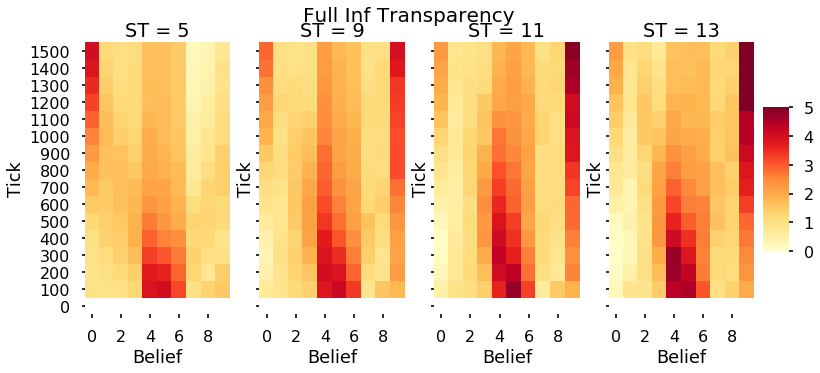

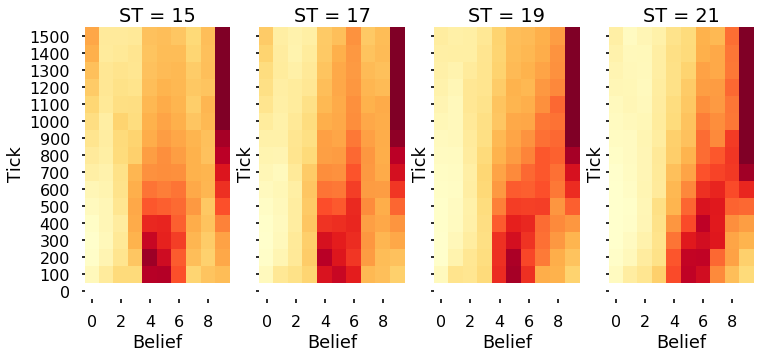

In [32]:
plt.cla()
plt.close()
fig1, (ax0,ax1,ax2,ax3) = plt.subplots(1,4, sharex=True, sharey=True)
fig2, (ax4,ax5,ax6,ax7) = plt.subplots(1,4, sharex=True, sharey=True)
cbar_ax = fig1.add_axes([.91,.3,.03,.4])
Data2 = Average5.pivot("Tick", "Belief", "Students")
Data3 = Average9.pivot("Tick", "Belief", "Students")
Data4 = Average11.pivot("Tick", "Belief", "Students")
Data5 = Average13.pivot("Tick", "Belief", "Students")
Data6 = Average15.pivot("Tick", "Belief", "Students")
Data7 = Average17.pivot("Tick", "Belief", "Students")
Data8 = Average19.pivot("Tick", "Belief", "Students")
Data9 = Average21.pivot("Tick", "Belief", "Students")

sns.heatmap(Data2,cmap="YlOrRd",ax=ax0,cbar=True,vmin=0,vmax=5,cbar_ax = cbar_ax)
sns.heatmap(Data3,cmap="YlOrRd",ax=ax1,cbar=True,vmin=0,vmax=5,cbar_ax = cbar_ax)
sns.heatmap(Data4,cmap="YlOrRd",ax=ax2,cbar=True,vmin=0,vmax=5,cbar_ax = cbar_ax)
sns.heatmap(Data5,cmap="YlOrRd",ax=ax3,cbar=True,vmin=0,vmax=5,cbar_ax = cbar_ax)
sns.heatmap(Data6,cmap="YlOrRd",ax=ax4,cbar=True,vmin=0,vmax=5,cbar_ax = cbar_ax)
sns.heatmap(Data7,cmap="YlOrRd",ax=ax5,cbar=True,vmin=0,vmax=5,cbar_ax = cbar_ax)
sns.heatmap(Data8,cmap="YlOrRd",ax=ax6,cbar=True,vmin=0,vmax=5,cbar_ax = cbar_ax)
sns.heatmap(Data9,cmap="YlOrRd",ax=ax7,cbar=True,vmin=0,vmax=5,cbar_ax = cbar_ax)

ax3.invert_yaxis()
ax7.invert_yaxis()

ax0.set_title('ST = 5')
ax1.set_title('ST = 9')
ax2.set_title('ST = 11')
ax3.set_title('ST = 13')
ax4.set_title('ST = 15')
ax5.set_title('ST = 17')
ax6.set_title('ST = 19')
ax7.set_title('ST = 21')

fig1.suptitle('Full Inf Transparency',fontsize=20)

fig1.set_size_inches(12,5,forward=True)
fig2.set_size_inches(12,5,forward=True)

plt.savefig('HeatMapFITST.jpg')
plt.show()

# Theory of Mind model

In [32]:
ToMSimThres = pd.read_csv('SimThresToM.csv',sep=',', skiprows=6, error_bad_lines=False)

In [33]:
ToMNumStuds = pd.read_csv('GroupSizeToM.csv',sep=',', skiprows=6, error_bad_lines=False)

In [34]:
ToMSimThres.rename(columns={'[run number]':'run', '[step]' : 'tick', '[name] of student 7' : 'name' ,
                     '[plot_belief] of student 7' : 'belief' , 'mean_TotalTickChangeBel' : 'MeanBeliefChange',
                    'PercInfluenced': 'ShareInfluenced', 'SocialGroupSA' : 'SizeRefGroup', 'carshare': 'Share of car users',
                    'bikeshare': 'Share of bike users', 'busshare' : 'Share of bus users'},inplace=True)
ToMNumStuds.rename(columns={'[run number]':'run', '[step]' : 'tick', '[name] of student 7' : 'name' ,
                     '[plot_belief] of student 7' : 'belief' , 'mean_TotalTickChangeBel' : 'MeanBeliefChange',
                    'PercInfluenced': 'ShareInfluenced', 'SocialGroupSA' : 'SizeRefGroup', 'carshare': 'Share of car users',
                    'bikeshare': 'Share of bike users', 'busshare' : 'Share of bus users'},inplace=True)


### Group size, ToM

In [15]:
SizeRefGroupToMGS = (
    ggplot(ToMNumStuds, aes(group = 'NumStudents') ) 
       + plotnine.geoms.geom_boxplot(
           aes(x='NumStudents', y='SizeRefGroup'),
                       size=0.2, alpha = 0.2
                       
           ) +
    labs(
        x = 'group-size',
         y = 'Total shift in beliefs',
    ) )

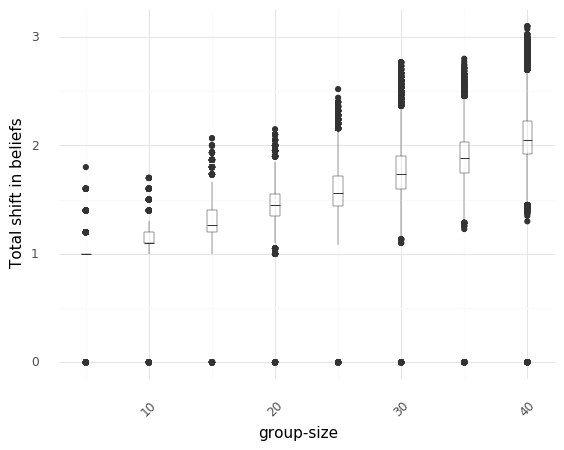

<ggplot: (-9223372036567123263)>

In [16]:
SizeRefGroupToMGS

In [17]:
SizeRefGroupToMGS.save(filename = 'SizeRefGroupToMGS.png', height=7, width=10, units = 'in', dpi=1000)


In [18]:
BoxplotToMNS = (
    ggplot(ToMNumStuds, aes(group = 'NumStudents') ) 
       + plotnine.geoms.geom_boxplot(
           aes(x='NumStudents', y='MeanBeliefChange'),
                       size=0.2, alpha = 0.2
                       
           ) +
    labs(
        x = 'group-size',
         y = 'Total shift in beliefs',
    ) )

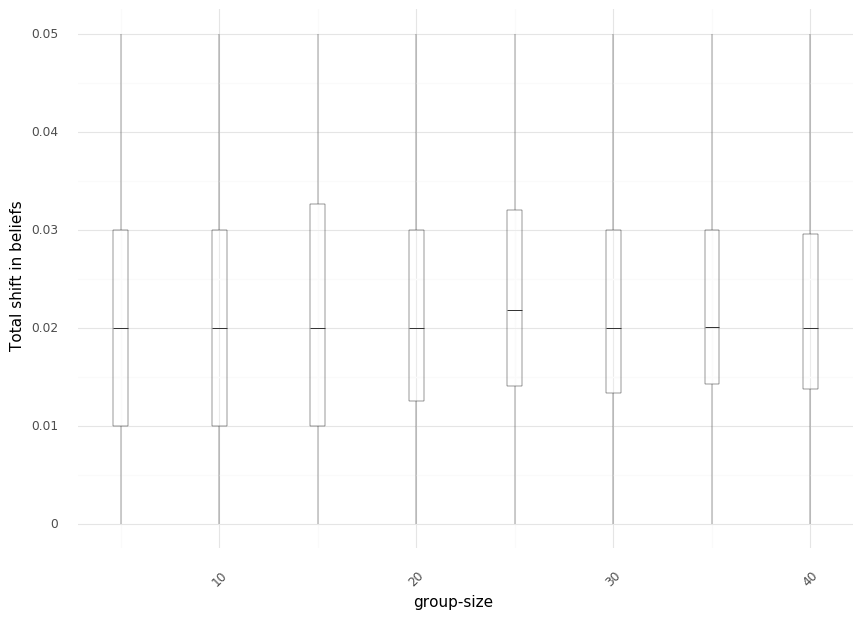

<ggplot: (312595790)>

In [19]:
BoxplotToMNS

In [20]:
BoxplotToMNS.save(filename = 'BoxplotToMNS.png', height=7, width=10, units = 'in', dpi=1000)

### Opinion Space NumStudents ToM

In [21]:
OpinionSpaceToMNS =(ggplot(aes(x = 'tick', y='belief', group='run', colour = 'name')) 
         +
  geom_line(data=ToMNumStuds, size=0.5, alpha = 0.2) 
         +
    labs(
        title ='Opinion space',
        x = 'ticks',
         y = 'Degree of belief',
    ) +
    scale_x_continuous(
        limits = (0, 1500),
        labels = labels(0, 1500, 500),
        breaks = breaks(0, 1500, 500)
    ) +
    scale_y_continuous(
        limits = (0, 12),
        labels = labels(0, 10, 5),
        breaks = breaks(0, 10, 5)
   ) + 
    facet_wrap(['NumStudents'])+
    #    theme(strip_text_y = element_text(angle =-45))+
         theme(figure_size=(11, 8) ))

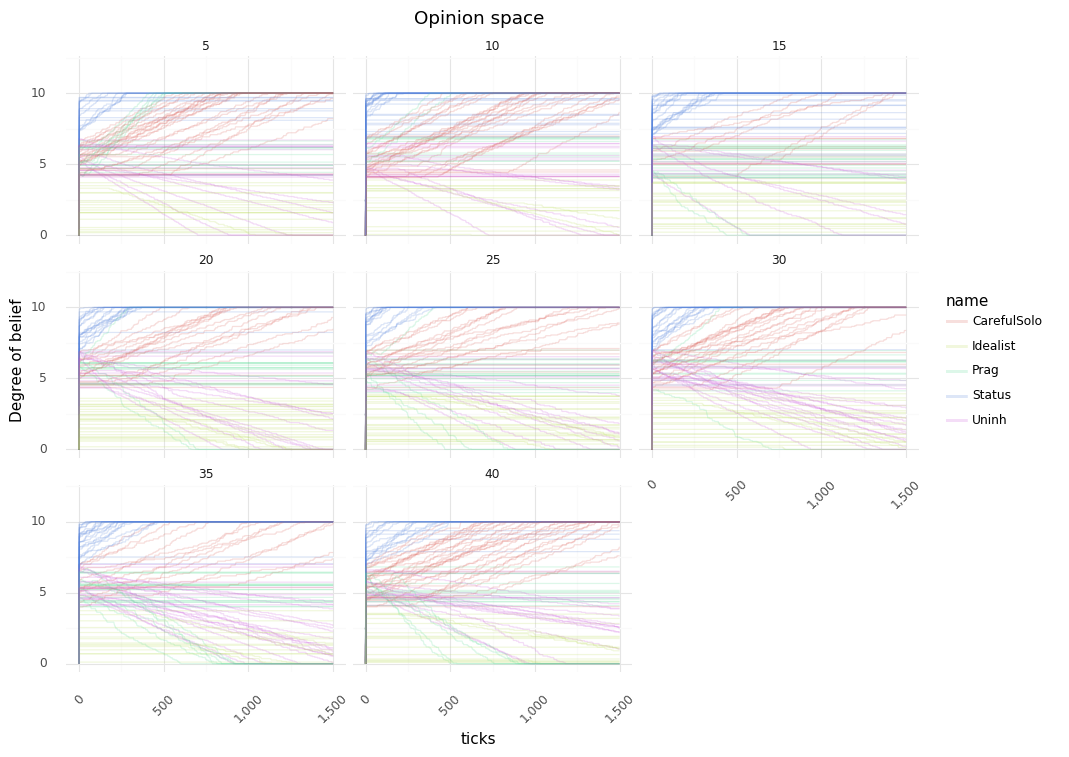

<ggplot: (-9223372036567815364)>

In [22]:
OpinionSpaceToMNS

In [23]:
OpinionSpaceToMNS.save(filename = 'OpinionSpaceToMNS.png', height=7, width=10, units = 'in', dpi=1000)

In [24]:
for a in lstNS:
    Data2 = ToMNumStuds[ToMNumStuds['NumStudents'] == a]
    Sorted = Data2.sort_values('tick')
    NumTicks = np.arange(0, 1502)
    Average = pd.DataFrame(columns= ['Tick', 'Belief', 'Students'])

    
    Tick = []
    Belief = []
    NumStuds = []  
    Mode = []
    Value = []


    for i in NumTicks:
        low = (i-1)*100
        high = i *100
        Now = Sorted[low:high]
        zero = Now['zero'].mean(axis=0)
        one = Now['one'].mean(axis=0)
        two = Now['two'].mean(axis=0)
        three = Now['three'].mean(axis=0)
        four = Now['four'].mean(axis=0)
        five = Now['five'].mean(axis=0)
        six = Now['six'].mean(axis=0)
        seven = Now['seven'].mean(axis=0)
        eight = Now['eight'].mean(axis=0)
        nine = Now['nine'].mean(axis=0)

    
        Tick.append(i)
        Belief.append(0)
        NumStuds.append(zero)    

        Tick.append(i)
        Belief.append(1)
        NumStuds.append(one)
    
        Tick.append(i)
        Belief.append(2)
        NumStuds.append(two)
    
        Tick.append(i)
        Belief.append(3)
        NumStuds.append(three)   
   
        Tick.append(i)
        Belief.append(4)
        NumStuds.append(four)
    
        Tick.append(i)
        Belief.append(5)
        NumStuds.append(five)
    
        Tick.append(i)
        Belief.append(6)
        NumStuds.append(six)
    
        Tick.append(i)
        Belief.append(7)
        NumStuds.append(seven)
       
        Tick.append(i)
        Belief.append(8)
        NumStuds.append(eight)
   
        Tick.append(i)
        Belief.append(9)
        NumStuds.append(nine)
    
                
    Average.Tick = Tick
    Average.Belief = Belief
    Average.Students = NumStuds
    Average = Average.query('Tick == 0| Tick == 100 |Tick == 200 | Tick == 300 |Tick == 400| Tick == 500 | Tick == 600| Tick == 700 | Tick == 800| Tick == 900| Tick == 1000| Tick == 1100| Tick == 1200| Tick == 1300| Tick == 1400| Tick == 1500')       
    if a == 5:
        Average['Students'] = Average['Students'].apply(lambda x: (x / 5) * 100 )
        Average5 = Average
    if a == 10:
        Average['Students'] = Average['Students'].apply(lambda x: (x / 10) * 100)
        Average10 = Average
    if a == 15:
        Average['Students'] = Average['Students'].apply(lambda x: (x / 15) * 100)
        Average15 = Average
    if a == 20:
        Average['Students'] = Average['Students'].apply(lambda x: (x / 20) * 100)
        Average20 = Average
    if a == 25:
        Average['Students'] = Average['Students'].apply(lambda x: (x / 25) * 100)
        Average25 = Average
    if a == 30:    
        Average['Students'] = Average['Students'].apply(lambda x: (x / 30) * 100)
        Average30 = Average
    if a == 35:
        Average['Students'] = Average['Students'].apply(lambda x: ( x / 35) * 100)
        Average35 = Average
    if a == 40:
        Average['Students'] = Average['Students'].apply(lambda x: (x / 40) * 100)
        Average40 = Average

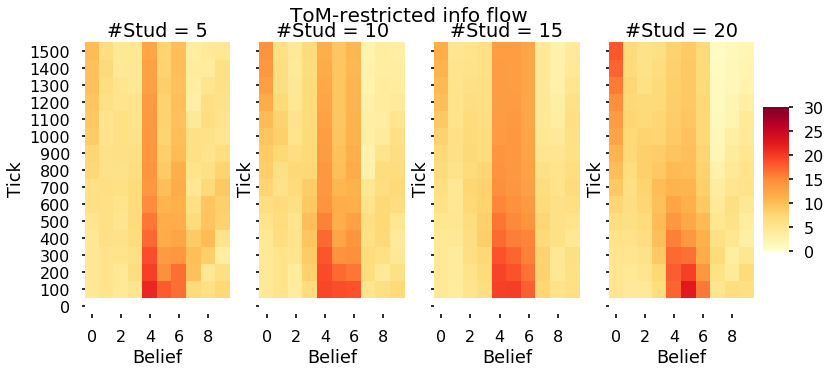

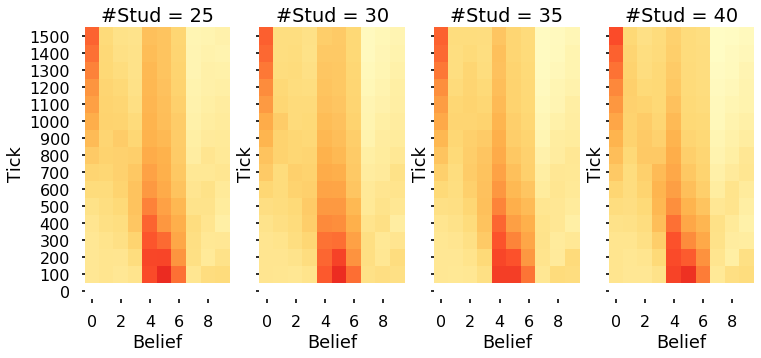

In [39]:
plt.cla()
plt.close()
fig1, (ax0,ax1,ax2,ax3) = plt.subplots(1,4, sharex=True, sharey=True)
fig2, (ax4,ax5,ax6,ax7) = plt.subplots(1,4, sharex=True, sharey=True)
cbar_ax = fig1.add_axes([.91,.3,.03,.4])
Data2 = Average5.pivot("Tick", "Belief", "Students")
Data3 = Average10.pivot("Tick", "Belief", "Students")
Data4 = Average15.pivot("Tick", "Belief", "Students")
Data5 = Average20.pivot("Tick", "Belief", "Students")
Data6 = Average25.pivot("Tick", "Belief", "Students")
Data7 = Average30.pivot("Tick", "Belief", "Students")
Data8 = Average35.pivot("Tick", "Belief", "Students")
Data9 = Average40.pivot("Tick", "Belief", "Students")

sns.heatmap(Data2,cmap="YlOrRd",ax=ax0,cbar=True,vmin=0,vmax=30,cbar_ax = cbar_ax)
sns.heatmap(Data3,cmap="YlOrRd",ax=ax1,cbar=True,vmin=0,vmax=30,cbar_ax = cbar_ax)
sns.heatmap(Data4,cmap="YlOrRd",ax=ax2,cbar=True,vmin=0,vmax=30,cbar_ax = cbar_ax)
sns.heatmap(Data5,cmap="YlOrRd",ax=ax3,cbar=True,vmin=0,vmax=30,cbar_ax = cbar_ax)
sns.heatmap(Data6,cmap="YlOrRd",ax=ax4,cbar=True,vmin=0,vmax=30,cbar_ax = cbar_ax)
sns.heatmap(Data7,cmap="YlOrRd",ax=ax5,cbar=True,vmin=0,vmax=30,cbar_ax = cbar_ax)
sns.heatmap(Data8,cmap="YlOrRd",ax=ax6,cbar=True,vmin=0,vmax=30,cbar_ax = cbar_ax)
sns.heatmap(Data9,cmap="YlOrRd",ax=ax7,cbar=True,vmin=0,vmax=30,cbar_ax = cbar_ax)

ax3.invert_yaxis()
ax7.invert_yaxis()

ax0.set_title('#Stud = 5')
ax1.set_title('#Stud = 10')
ax2.set_title('#Stud = 15')
ax3.set_title('#Stud = 20')
ax4.set_title('#Stud = 25')
ax5.set_title('#Stud = 30')
ax6.set_title('#Stud = 35')
ax7.set_title('#Stud = 40')

fig1.suptitle('ToM-restricted info flow',fontsize=20)

fig1.set_size_inches(12,5,forward=True)
fig2.set_size_inches(12,5,forward=True)

plt.savefig('HeatMapToMNS.jpg')

plt.show()

### Similarity Threshold

In [35]:
BoxplotToMST = (
    ggplot(ToMSimThres, aes() ) 
       + plotnine.geoms.geom_boxplot(
           aes(x='Similarity_Threshold', y='MeanBeliefChange', group = 'Similarity_Threshold'),
                       size=0.2, alpha = 0.2
                       
           ) +
    labs(
        x = 'Similarity threshold',
         y = 'Mean shift in beliefs',
    ) )

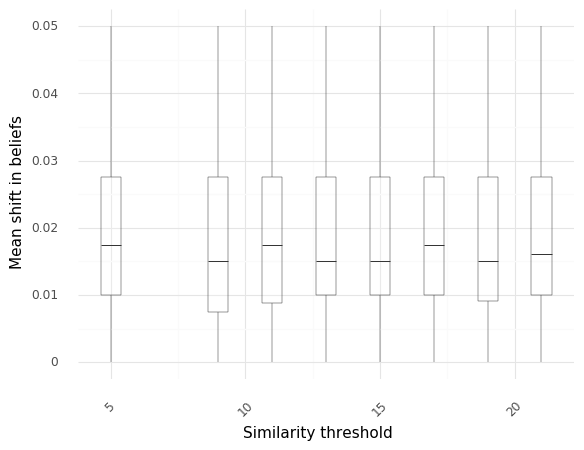

<ggplot: (-9223372036567357657)>

In [36]:
BoxplotToMST

In [ ]:
BoxplotToMST.save(filename = 'BoxplotToMST.png', height=7, width=10, units = 'in', dpi=1000)

## Opinion Dynamics, ToM, Similarity Threshold

In [37]:
#Opinion dynamics for all mode-value combinations

OpinionSpaceToMST =(ggplot(aes(x = 'tick', y='belief', group='run', colour = 'name')) 
         +
  geom_line(data=ToMSimThres, size=0.5, alpha = 0.2) 
         +
    labs(
        title ='Opinion space',
        x = 'ticks',
         y = 'Degree of belief',
    ) +
    scale_x_continuous(
        limits = (0, 1500),
        labels = labels(0, 1500, 500),
        breaks = breaks(0, 1500, 500)
    ) +
    scale_y_continuous(
        limits = (0, 12),
        labels = labels(0, 10, 5),
        breaks = breaks(0, 10, 5)
   ) + 
    facet_wrap(['Similarity_Threshold'])+
    #    theme(strip_text_y = element_text(angle =-45))+
         theme(figure_size=(11, 8) ))


 
    

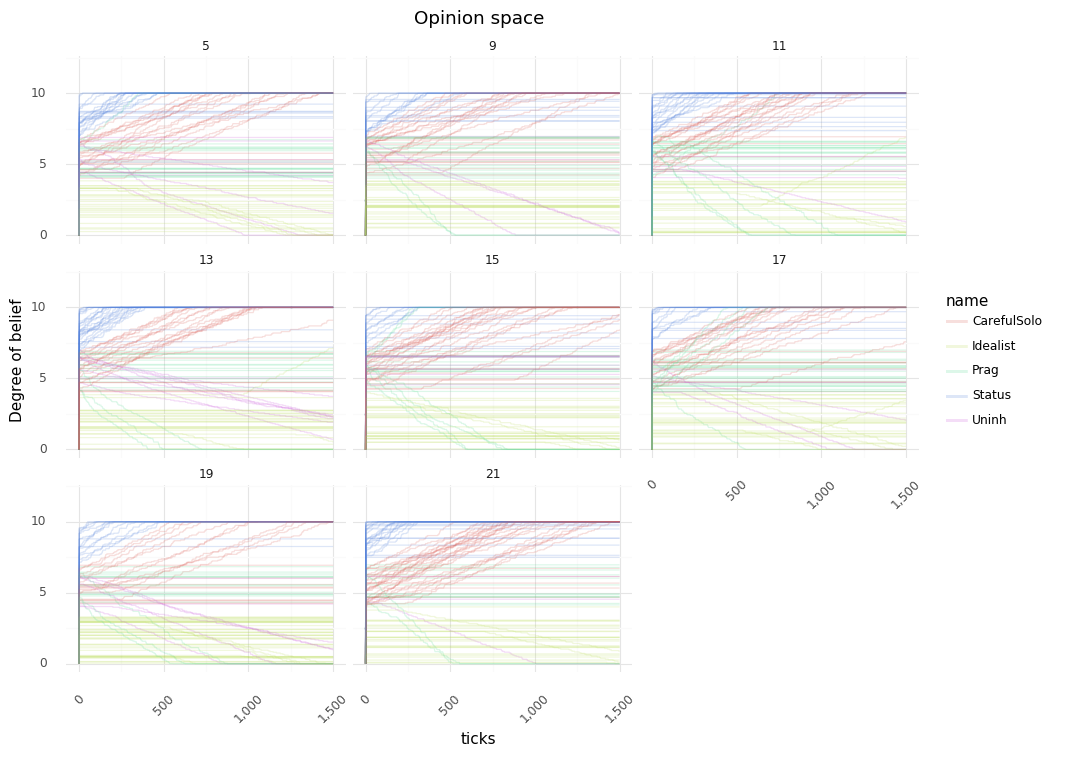

<ggplot: (287647629)>

In [38]:
OpinionSpaceToMST

In [ ]:
OpinionSpaceToMST.save(filename = 'OpinionSpaceToMST.png', height=7, width=10, units = 'in', dpi=1000)

### Heat Map

In [40]:
for a in lstST:
    Data2 = ToMSimThres[ToMSimThres['Similarity_Threshold'] == a]
    Data2 = Data2.sort_values('tick')
    NumTicks = np.arange(0, 1502)
    Average = pd.DataFrame(columns= ['Tick', 'Belief', 'Students'])

    
    Tick = []
    Belief = []
    NumStuds = []  
    Mode = []
    Value = []


    for i in NumTicks:
        low = (i-1)*100
        high = i *100
        Now = Data2[low:high]
        zero = Now['zero'].mean(axis=0)
        one = Now['one'].mean(axis=0)
        two = Now['two'].mean(axis=0)
        three = Now['three'].mean(axis=0)
        four = Now['four'].mean(axis=0)
        five = Now['five'].mean(axis=0)
        six = Now['six'].mean(axis=0)
        seven = Now['seven'].mean(axis=0)
        eight = Now['eight'].mean(axis=0)
        nine = Now['nine'].mean(axis=0)

    
        Tick.append(i)
        Belief.append(0)
        NumStuds.append(zero)    

        Tick.append(i)
        Belief.append(1)
        NumStuds.append(one)
    
        Tick.append(i)
        Belief.append(2)
        NumStuds.append(two)
    
        Tick.append(i)
        Belief.append(3)
        NumStuds.append(three)   
   
        Tick.append(i)
        Belief.append(4)
        NumStuds.append(four)
    
        Tick.append(i)
        Belief.append(5)
        NumStuds.append(five)
    
        Tick.append(i)
        Belief.append(6)
        NumStuds.append(six)
    
        Tick.append(i)
        Belief.append(7)
        NumStuds.append(seven)
       
        Tick.append(i)
        Belief.append(8)
        NumStuds.append(eight)
   
        Tick.append(i)
        Belief.append(9)
        NumStuds.append(nine)
    
                
    Average.Tick = Tick
    Average.Belief = Belief
    Average.Students = NumStuds
    Average = Average.query('Tick == 0| Tick == 100 |Tick == 200 | Tick == 300 |Tick == 400| Tick == 500 | Tick == 600| Tick == 700 | Tick == 800| Tick == 900| Tick == 1000| Tick == 1100| Tick == 1200| Tick == 1300| Tick == 1400| Tick == 1500')       
    if a == 5:
        Average5 = Average
    if a == 9:
        Average9 = Average
    if a == 11:
        Average11 = Average
    if a == 13:
        Average13 = Average
    if a == 15:
        Average15 = Average
    if a == 17:
        Average17 = Average
    if a == 19:
        Average19 = Average
    if a == 21:
        Average21 = Average
            

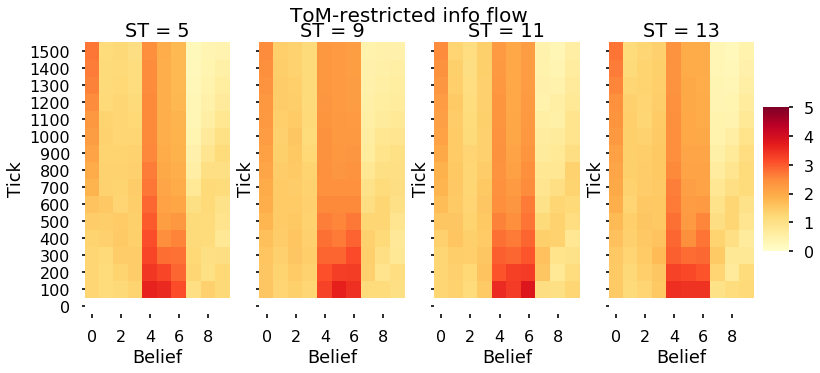

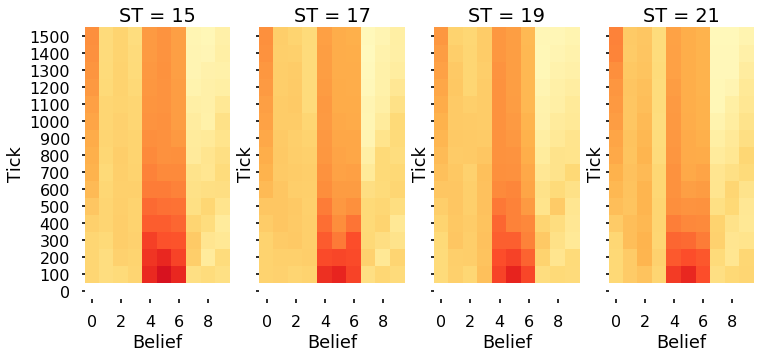

In [41]:
plt.cla()
plt.close()
fig1, (ax0,ax1,ax2,ax3) = plt.subplots(1,4, sharex=True, sharey=True)
fig2, (ax4,ax5,ax6,ax7) = plt.subplots(1,4, sharex=True, sharey=True)
cbar_ax = fig1.add_axes([.91,.3,.03,.4])
Data2 = Average5.pivot("Tick", "Belief", "Students")
Data3 = Average9.pivot("Tick", "Belief", "Students")
Data4 = Average11.pivot("Tick", "Belief", "Students")
Data5 = Average13.pivot("Tick", "Belief", "Students")
Data6 = Average15.pivot("Tick", "Belief", "Students")
Data7 = Average17.pivot("Tick", "Belief", "Students")
Data8 = Average19.pivot("Tick", "Belief", "Students")
Data9 = Average21.pivot("Tick", "Belief", "Students")

sns.heatmap(Data2,cmap="YlOrRd",ax=ax0,cbar=True,vmin=0,vmax=5,cbar_ax = cbar_ax)
sns.heatmap(Data3,cmap="YlOrRd",ax=ax1,cbar=True,vmin=0,vmax=5,cbar_ax = cbar_ax)
sns.heatmap(Data4,cmap="YlOrRd",ax=ax2,cbar=True,vmin=0,vmax=5,cbar_ax = cbar_ax)
sns.heatmap(Data5,cmap="YlOrRd",ax=ax3,cbar=True,vmin=0,vmax=5,cbar_ax = cbar_ax)
sns.heatmap(Data6,cmap="YlOrRd",ax=ax4,cbar=True,vmin=0,vmax=5,cbar_ax = cbar_ax)
sns.heatmap(Data7,cmap="YlOrRd",ax=ax5,cbar=True,vmin=0,vmax=5,cbar_ax = cbar_ax)
sns.heatmap(Data8,cmap="YlOrRd",ax=ax6,cbar=True,vmin=0,vmax=5,cbar_ax = cbar_ax)
sns.heatmap(Data9,cmap="YlOrRd",ax=ax7,cbar=True,vmin=0,vmax=5,cbar_ax = cbar_ax)


ax3.invert_yaxis()
ax7.invert_yaxis()

ax0.set_title('ST = 5')
ax1.set_title('ST = 9')
ax2.set_title('ST = 11')
ax3.set_title('ST = 13')
ax4.set_title('ST = 15')
ax5.set_title('ST = 17')
ax6.set_title('ST = 19')
ax7.set_title('ST = 21')

fig1.suptitle('ToM-restricted info flow',fontsize=20)

fig1.set_size_inches(12,5,forward=True)
fig2.set_size_inches(12,5,forward=True)

plt.savefig('HeatMapToMST.jpg')

plt.show()